In [1]:
import keras
import pandas as pd
from gensim.models.word2vec import Word2Vec
import gensim.models.word2vec as word2vec
from keras.layers import *
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
import numpy as np
from keras import optimizers
from keras import regularizers
from keras import Sequential
import tensorflow as tf
import seaborn as sns

In [2]:
trainset = pd.read_csv('trainset.csv')
trainset.loc[trainset['score']== -1, 'score'] = 2
testset = pd.read_csv('testset.csv')
testset.loc[testset['score']== -1, 'score'] = 2

In [3]:
x_train = list(trainset.text)
x_test = list(testset.text)


y_train = np.array(trainset.score)
y_train= to_categorical(y_train)
y_test = np.array(testset.score)

In [4]:
max_feature = 5000
maxlen = 50
embed_size = 25

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(x_train)
token_train = tokenizer.texts_to_sequences(x_train)
token_test = tokenizer.texts_to_sequences(x_test)

In [5]:
x_train = pad_sequences(token_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(token_test, maxlen=maxlen, padding='post')

In [13]:
saved_model = keras.models.load_model('lstm_model_new')

In [14]:
prob = np.load('pred_prob.npy')

In [15]:
y_pred = np.argmax(prob, axis=-1)
cols = ['0','1','2']
pred_score =[int(cols[i]) for i in y_pred]

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
def plot_cm(cm):
    sns.set_context({'figure.figsize':(8,8)})
    ax =['0','1','2']
    sns.heatmap(cm,annot=True,fmt='d',cmap='RdBu_r')

# plot_cm(confusion_matrix(y_test,(pred_score)))

In [19]:
cm = confusion_matrix(pred_score, y_test)

In [20]:
print(cm)

[[ 145639  444180   51824]
 [  27642 1585771   16514]
 [  28187  149655  248780]]


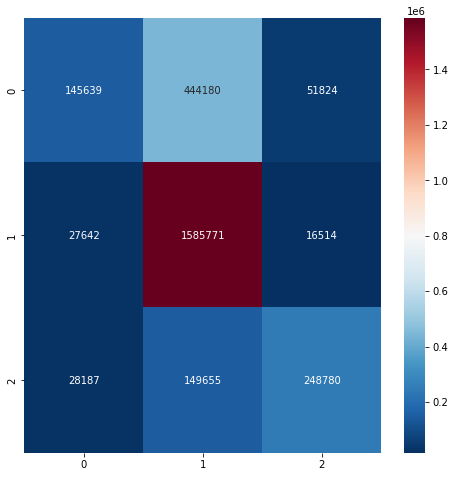

In [23]:
plot_cm(cm)

In [28]:
print(classification_report(y_test,pred_score,digits=3))

              precision    recall  f1-score   support

         0.0      0.227     0.723     0.345    201468
         1.0      0.973     0.728     0.833   2179606
         2.0      0.583     0.785     0.669    317118

    accuracy                          0.734   2698192
   macro avg      0.594     0.745     0.616   2698192
weighted avg      0.871     0.734     0.777   2698192



In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [44]:
y_prob = [i[1] for i in prob]

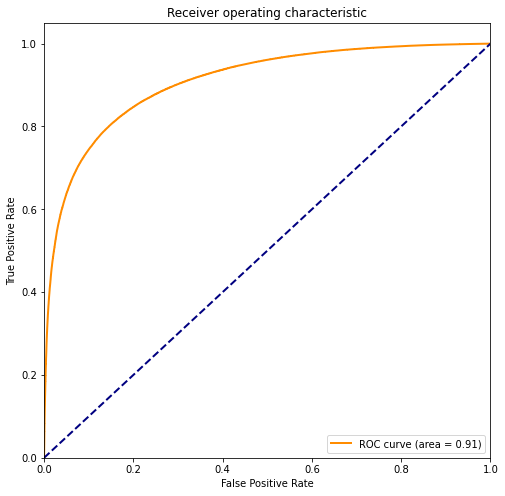

In [45]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()